# Homework 6: Dimensionality Reduction (100 points)

In this homework, you will be implementing Principal Component Analysis (PCA) and K-means clustering from scratch in python using NumPy.

In [ ]:
import numpy as np
import pandas as pd
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
%matplotlib inline
import random #just in case

# Load Data

Load train and test data for the Fashion MNIST dataset using PyTorch.

In [ ]:
data_dimension  = 28*28   # images are 28x28 pixels
num_classes = 10      # there are 10 classes

train_dataset = datasets.FashionMNIST(
    root="data_fashion",
    train=True,
    download=True,
    transform=transforms.ToTensor(),
)

# Download test data from open datasets.
test_dataset = datasets.FashionMNIST(
    root="data_fashion",
    train=False,
    download=True,
    transform=transforms.ToTensor(),
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data_fashion/FashionMNIST/raw/train-images-idx3-ubyte.gz to data_fashion/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data_fashion/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data_fashion/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data_fashion/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data_fashion/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data_fashion/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data_fashion/FashionMNIST/raw



## Part A: Subsampling from the dataset

In this part, you must subsample the train and test set such both contain 1000 images, with 100 images from each of the 10 classes. Also store the labels for each image.

You are supposed to flatten the image, convert it to a numpy array and append it to the list. After that, np.array(images) should convert it to a size of (1000, 784)

 just use images.append() 
 
 Also, if "Has anyone figured out how to get the dimensions of the sub-sampling to (1000, 784)? I flattened the images and converted them to numpy arrays and my dimension is (1000, 1, 784)" try squezzing
 

In [ ]:
images_per_class = 100

# Create a new dataset with only 100 images per class and with a total of 1000 images
def create_subset(dataset, images_per_class):
    """
    Create a dataset with only a given number of images per class.

    Args:
        dataset: The original dataset
        images_per_class: The number of images per class to keep
    
    Returns:
        images: A numpy array of shape (num_classes * images_per_class, data_dimension)
        labels: A numpy array of shape (num_classes * images_per_class,)
    """
    
    images, labels = [], []

    num_img = 10000 #this is the number of images in test tensor, going over all of them will assure that we get a 100 of each class
    
    loader = torch.utils.data.DataLoader(dataset, batch_size = num_img, shuffle=False)
    
    for data in loader:
      break

    for i in range(num_classes):
      count = 0 

      for j in range(num_img):
        if data[1][j].numpy() == i and count < images_per_class:
          images.append((data[0][j][0].numpy()).flatten())
          labels.append(data[1][j].numpy())
          count += 1

        #add a thousand of thes
    # WRITE YOUR CODE HERE
    
    #.reshape((1000,784))
    return np.array(images), np.array(labels)

# Train and test data
train_images, train_labels = create_subset(train_dataset, images_per_class)
test_images, test_labels = create_subset(test_dataset, images_per_class)

In [ ]:
#lets count the elements for each class

elements_count = {}
# iterating over the elements for frequency
for element in test_labels:
   # checking whether it is in the dict or not
   if element in elements_count:
      # incerementing the count by 1
      elements_count[element] += 1
   else:
      # setting the count to 1
      elements_count[element] = 1
# printing the elements frequencies
for key, value in elements_count.items():
   print(f"{key}: {value}")

0: 100
1: 100
2: 100
3: 100
4: 100
5: 100
6: 100
7: 100
8: 100
9: 100


In [ ]:
train_images.shape
#so everything is perfect around here

(1000, 784)

### Plot grid of images

You must complete the `plot_grid` function defined below. A sample image of the plot has been provided with the homework (see `sample_output_grid.png`).

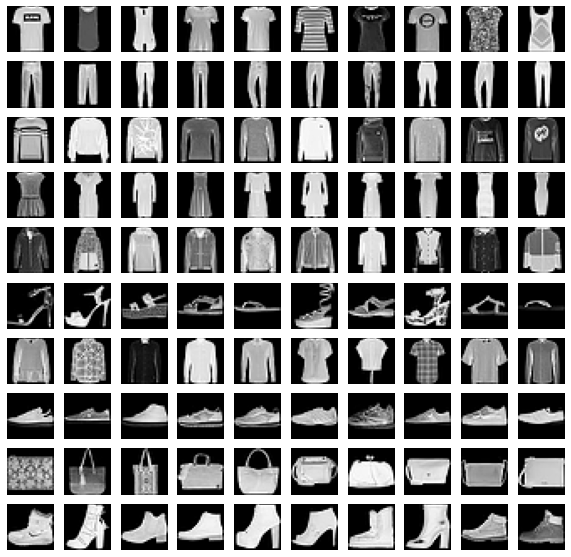

In [ ]:
def plot_grid(images, labels, num_classes, num_images_per_class):
    """
    Plot a grid of images of shape num_classes x images_per_class. Each row must 
    contain the images belonging to an unique class.

    Args:
        images: A numpy array of shape (num_classes * images_per_class, data_dimension)
        labels: A numpy array of shape (num_classes * images_per_class,)
        num_classes: The number of classes
        num_images_per_class: The number of images per class to be displayed
    
    Hint: Use plt.subplot to plot the images in a grid.
    """
    # WRITE YOUR CODE HERE
    
    dim = int(np.sqrt(images.shape[1]))

    fig, axs = plt.subplots(num_classes, num_images_per_class, figsize=(10,10))

    for i,l in enumerate(range(num_classes)):

      for j in range(num_images_per_class):

        axs[i,j].imshow(images[train_labels==l][j].reshape((dim,dim)),cmap='gray')
        axs[i,j].axis('off')


plot_grid(train_images, train_labels, num_classes, 10)
        
        

# Part B: Principal Component Analysis (PCA)

Perform principal component analysis (PCA) on the train dataset to reduce the data dimension from `784` to `100`.

In [ ]:
#second version following comments:

def PCA(X , num_components):
    """
    Function to perform PCA on the dataset X.

    Args:
        X: A numpy array of shape (num_samples, data_dimension)
        num_components: The number of principal components to keep

    Returns:
        X_reduced: A numpy array of shape (num_samples, num_components). The represents the reduced data.
        X_reconstructed: A numpy array of shape (num_samples, data_dimension). The represents the reconstructed data from the reduced data.
    """
    # WRITE YOUR CODE HERE
    mu = np.mean(X, axis = 0)    
    std = np.std(X, axis = 0)  
    std_filled = std.copy()
    std_filled[std == 0] = 1.0     
    X_scaled = (X - mu) / std_filled  
    cov_matrix = np.cov(X_scaled.T)
    eig_val, eig_vec = np.linalg.eigh(cov_matrix)   
    sorted_eig  = np.argsort(-eig_val)
    eig_val = eig_val[sorted_eig]
    eig_vec = eig_vec[:, sorted_eig]

    final_vectors = eig_vec[:, range(num_components)]

    X_reduced = np.dot(X, final_vectors)
    
    X_reconstructed = np.dot(X_reduced, final_vectors.T)
     
    return X_reduced, X_reconstructed

In [ ]:
def PCA(X , num_components):
    """
    Function to perform PCA on the dataset X.

    Args:
        X: A numpy array of shape (num_samples, data_dimension)
        num_components: The number of principal components to keep

    Returns:
        X_reduced: A numpy array of shape (num_samples, num_components). The represents the reduced data.
        X_reconstructed: A numpy array of shape (num_samples, data_dimension). The represents the reconstructed data from the reduced data.
    """
    # WRITE YOUR CODE HERE

    mu = np.mean(X, axis = 0) 
        
    #calculate the standard deviation of each column std
    std = np.std(X, axis = 0)  
        
    #handleing zero standard deviation
    std_filled = std.copy()
    std_filled[std == 0] = 1.0
        
    #calculate standardized X called Xbar
    X_scaled = (X - mu) / std_filled  

    cov_matrix = np.cov(X_scaled.T)

    #lets get eigen vectors and values

    eig_val, eig_vec = np.linalg.eigh(cov_matrix)  
        
    #sorting them in decrasing order
    sorted_eig  = np.argsort(-eig_val)

    eig_val = eig_val[sorted_eig]
    eig_vec = eig_vec[:, sorted_eig]


    #Now lets subset num_components from it where 100 is num_components to keep by importance

    final_vectors = eig_vec[:, range(num_components)]

    #trying to tied everything up
    X_reduced = np.dot(X_scaled, final_vectors)

    #if you don't want to multiply and add at the end, substitute X_scaled with X

    X_reconstructed = np.dot(X_reduced, final_vectors.T) * std_filled + mu
     
    return X_reduced, X_reconstructed

## Please note that both functions are the same, just that one of them does not include the x_standarize on its X_reduced. Both give the same x_reconstruct, but it is more useful to have x_reduced not standarize so that we dont have to sum the mean and multiply the sd everytime we try to reconstruct a dataset

In [ ]:
pca_dimension = 100
train_images_pca, reconstruction = PCA(train_images, pca_dimension)


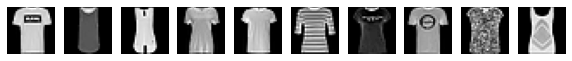

In [ ]:
# Visualize the original images
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

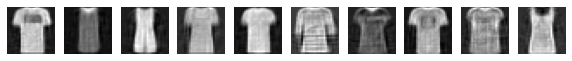

In [ ]:
# Visualize the reconstructed images
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(reconstruction[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

The reconstructed images must look similar to the original input images.

# Part C: KMeans Clustering

In this part, you will be clustering the train images that had been reduced to 100 dimensions using PCA into `10 clusters`.

In [ ]:
def euclidean(point, data):
    """
    Euclidean distance between point & data.
    Point has dimensions (m,), data has dimensions (n,m), and output will be of size (n,).

    Args:
        point: A numpy array of shape (m,)
        data: A numpy array of shape (n,m)

    Returns:
        A numpy array of shape (n,) containing the euclidean distance between point and each row of data.
    """

    distance  = np.sqrt(np.sum((point - data)**2, axis=1))

    return distance

class KMeans:
    """
    Class to perform K-Means clustering.
    """
    def __init__(self, n_clusters=8, max_iter=300):
        """
        Args:
            n_clusters: The number of clusters
            max_iter: The maximum number of iterations to run the algorithm for
        
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
    
    def init_centroids(self, X):
        """
        Initialize the centroids by randomly sampling from the dataset. Store the computed
        centroids in self.centroids.

        Args:
            X: A numpy array of shape (num_samples, data_dimension)
        
        Hint: Initialize the centroids such that when a random datapoint is selected as the first, 
              the rest are initialized w/ probabilities proportional to their distances to the first.
              You may use argument `p` in np.random.choice to do this.
        """

        #lets initialize it randomly first 

        self.centroids = [random.choice(X)]

        #now lets initialize the rest with probabilities proportional to their distances
        for _ in range(self.n_clusters-1):

            dists = np.sum([euclidean(centroid, X) for centroid in self.centroids], axis=0)
            # Normalize
            dists /= np.sum(dists)
            # use the p argument in random choice
            new_centroid_idx = np.random.choice(range(len(X)), size=1, p=dists)[0] 
            #update vals
            self.centroids += [X[new_centroid_idx]]

    def fit(self, X_train):
        """
        Train the K-Means model on the dataset X_train.

        Args:
            X_train: A numpy array of shape (num_samples, data_dimension)

        Hint: 
            (1) Use the euclidean function defined above. 
            (2) Run the algorithm for a maximum of self.max_iter iterations.
            (3) Initialize the centroids before running the clustering algorithm.
        """

        #initialize the centroids now 
        self.init_centroids(X_train)

        iteration = 0
        prev_centroids = None

        while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:

            # Sort each datapoint, assigning to nearest centroid
            sorted_points = [[] for _ in range(self.n_clusters)]

            for x in X_train:
                dists = euclidean(x, self.centroids)
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)

            # Push and reassign centroids 
            prev_centroids = self.centroids
            self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():  # bulletproof
                    self.centroids[i] = prev_centroids[i]
            iteration += 1
        

    def evaluate(self, X):
        """
        Function to evaluate the K-Means model on the dataset X.

        Args:
            X: A numpy array of shape (num_samples, data_dimension)
        
        Returns:
            centroids: A numpy array of shape (n_clusters, data_dimension) containing the centroids of the clusters.
            centroid_idxs: A numpy array of shape (num_samples,) containing the cluster labels for each sample in X.
        """
        centroids, centroid_idxs = [], []

        for x in X:
          #calculate distance
          dists = euclidean(x, self.centroids)
          #get the minimum id
          centroid_idx = np.argmin(dists)
          #append the actual minimun and its index
          centroids.append(self.centroids[centroid_idx])
          centroid_idxs.append(centroid_idx)


        centroids = np.array(centroids)
        centroid_idxs = np.array(centroid_idxs)
        centroids = centroids[range(10), :]



        return centroids, centroid_idxs

In [ ]:
#no max iter when initializing. Additionally, the default is 8 clusters

kmeans = KMeans(n_clusters=10)
kmeans.fit(train_images_pca)

# View results
class_centers, classification = kmeans.evaluate(train_images_pca)

### Plot mean image for each cluster

The KMeans clustering algorithm provides you with 10 clusters, with each cluster containing a set of images. In this part, you must compute the mean image for each cluster and plot it as a grid with 10 images such that each image corresponds to the mean image of a cluster. By mean image of a cluster, we imply the mean of the images contained in the cluster.

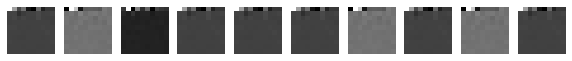

In [ ]:
# Plot grid of cluster images from each class

# Visualize the original images
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(class_centers[i].reshape(10, 10), cmap='gray')
    plt.axis('off')

# WRITE YOUR CODE HERE


In [ ]:
G = 10 #Number of labels
#2D matrix  for an array of indexes of the given label
cluster_index= [[] for i in range(G)]
for i, label in enumerate(G,0):
    for n in range(G):
        if label == n:
            cluster_index[n].append(i)
        else:
            continue
#Visualisation for clusters = clust
plt.figure(figsize=(20,20));
clust = 3 #enter label number to visualise
num = 100 #num of data to visualize from the cluster
for i in range(1,num): 
    plt.subplot(10, 10, i); #(Number of rows, Number of column per row, item number)
    plt.imshow(X[cluster_index[clust][i+500]].reshape(X_train.shape[1], X_train.shape[2]), cmap = plt.cm.binary);
    
plt.show()

TypeError: ignored

### Plot grid containing 10 images for each cluster

In this part, you must plot a grid of images of size `number of cluster x 10` with each row corresponding to a unique cluster and all columns corresponding to a row comprise 10 samples from the cluster that the row represents.

In [ ]:
# Plot 10 images from each cluster for each class

# WRITE YOUR CODE HERE


# Extra Credit: k-Nearest Neighbor (KNN) classification (25 points)

In this section, you are supposed to perform k-Nearest Neighbor classification on the test data and find the optimal value of `k` for which the model outputs the highest classification accuracy.

In [ ]:
def most_common(lst):
    '''Returns the most common element in a list. If there is a tie, returns the 
    element occuring first in the list.'''
    # WRITE YOUR CODE HERE

    most = max(set(lst), key=lst.count)

    return most


class KNearestNeighborsClassifier():
    """
    Class to perform K-Nearest Neighbors classification.
    """
    def __init__(self, k=5, dist_metric=euclidean):
        """
        Args:
            k: The number of nearest neighbors to use for classification
            dist_metric: The distance metric to use for classification. (Default: euclidean)
        """
        self.k = k
        self.dist_metric = dist_metric

    def fit(self, X_train, y_train):
        """
        Function to train the K-Nearest Neighbors classifier on the train dataset.

        Args:
            X_train: A numpy array of shape (num_samples, data_dimension) containing the training data.
            y_train: A numpy array of shape (num_samples,) containing the training labels.
        """
        # WRITE YOUR CODE HERE

        #we just initialize them here

        self.X_train = X_train
        self.y_train = y_train
       

    def predict(self, X_test):
        """
        Predict the labels for the test dataset.

        Args:
            X_test: A numpy array of shape (num_samples, data_dimension) containing the test data.

        Returns:
            y_pred: A numpy array of shape (num_samples,) containing the predicted labels for the test data.

        Hint: Use the self.dist_metric function to compute the distance between the test data and the training data.
              For each sample, choose the most common label among the k nearest neighbors.
        """
        # WRITE YOUR CODE HERE


        k_nearest_neighbors = []

        for x in X_test:

            distances = self.dist_metric(x, self.X_train)

            y_sorted = [n for _, n in sorted(zip(distances, self.y_train))]

            k_nearest_neighbors.append(y_sorted[:self.k])

        results = list(map(most_common, k_nearest_neighbors))


        return results


    def evaluate(self, X_test, y_test):
        """
        Evaluate the K-Nearest Neighbors classifier on the test dataset.

        Args:
            X_test: A numpy array of shape (num_samples, data_dimension) containing the test data.
            y_test: A numpy array of shape (num_samples,) containing the test labels.

        Returns:
            accuracy: A float value between 0 and 1 representing the accuracy of the classifier.
        """
        # WRITE YOUR CODE HERE

        y_pred = self.predict(X_test)
        accuracy = sum(y_pred == y_test) / len(y_test)

        return accuracy
        

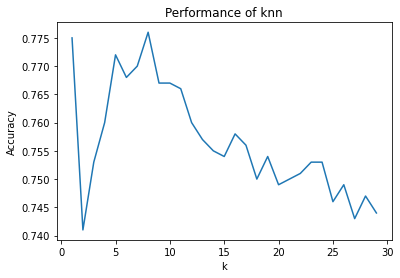

In [ ]:
# Evaluate KNN classifier for k varying from 1 to 30 and plot the accuracy
accuracies = []
ks = range(1, 30)
for k in ks:
    knn = KNearestNeighborsClassifier(k=k)
    knn.fit(train_images, train_labels)
    accuracy = knn.evaluate(test_images, test_labels)
    accuracies.append(accuracy)
fig, ax = plt.subplots()
ax.plot(ks, accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of knn")
plt.show()

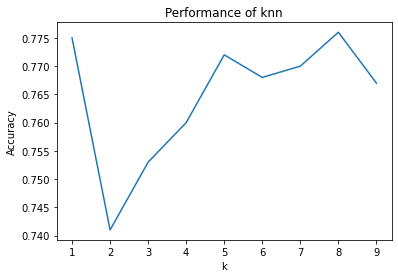

In [ ]:
# Evaluate KNN classifier for k varying from 1 to 30 and plot the accuracy
accuracies = []
ks = range(1, 10)
for k in ks:
    knn = KNearestNeighborsClassifier(k=k)
    knn.fit(train_images, train_labels)
    accuracy = knn.evaluate(test_images, test_labels)
    accuracies.append(accuracy)
fig, ax = plt.subplots()
ax.plot(ks, accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of knn")
plt.show()

In [ ]:
accuracies

[0.775, 0.741, 0.753, 0.76, 0.772, 0.768, 0.77, 0.776, 0.767]

### Report the k for which you get the highest accuracy on the test dataset.

Write your answer here.

The highest accuracy is at 8. You can see it more clearly in the second graph. That accuracy is 0.776. Which is why we would use 8 clusters in the K-means clustering part.

---

